## VGG

In [ ]:
### VGG

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
import keras

from tensorflow.keras import layers, models, backend, utils, metrics

In [ ]:
#코랩 마운트
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/face

/content/drive/MyDrive/face


In [ ]:
#압축해제
#!unzip -qq "/content/drive/MyDrive/face/real-vs-fake.zip"

In [ ]:
#VGG import 및 입력크기 지정
from keras.applications.vgg16 import VGG16

INPUT_SIZE = 224
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(INPUT_SIZE, INPUT_SIZE,3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
#가져와서(전이학습) 고정된 층 학습시키않도록 함
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
#구조 생성
from keras.models import Model
from keras.layers import Dense, Flatten

input_ = vgg16.input
output_ = vgg16(input_)
last_layer = Flatten(name='flatten')(output_)
last_layer = Dense(1, activation='sigmoid')(last_layer)
model = Model(inputs=input_, outputs=last_layer)

In [ ]:
# Define hyperparameters
INPUT_SIZE = 224 #Change this to 48 if the code is taking too long to run
BATCH_SIZE = 16
STEPS_PER_EPOCH = 200
EPOCHS = 10

In [ ]:
#개수 확인(14만개 사용)
from glob import glob
filepaths1 = list(glob('/content/drive/MyDrive/face/train/real/*.jpg'))
filepaths2 = list(glob('/content/drive/MyDrive/face/test/real/*.jpg'))
filepaths3 = list(glob('/content/drive/MyDrive/face/valid/real/*.jpg'))
print(len(filepaths1), len(filepaths2), len(filepaths3))

50000 10000 10000


In [ ]:
#데이터 경로 지정 등 설정
from keras.preprocessing.image import ImageDataGenerator
path = '/content/drive/MyDrive/face/'

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

training_data_generator = ImageDataGenerator(rescale = 1./255)
validing_data_generator = ImageDataGenerator(rescale = 1./255)
testing_data_generator = ImageDataGenerator(rescale = 1./255)

train_generator = training_data_generator.flow_from_directory(
    path + 'train/',
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

valid_generator = validing_data_generator.flow_from_directory(
    path + 'valid/',
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = testing_data_generator.flow_from_directory(
    path + 'test/',
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=BATCH_SIZE,
    shuffle = False,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
#모델 학습
train_steps = 100000//16
valid_steps = 20000//16

hist = model.fit(
    train_generator,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_steps
)

Epoch 1/10
200/200 [==============================] - 91s 408ms/step - loss: 0.6034 - accuracy: 0.7006 - val_loss: 0.5333 - val_accuracy: 0.7283
Epoch 2/10
200/200 [==============================] - 64s 322ms/step - loss: 0.4981 - accuracy: 0.7631 - val_loss: 0.4571 - val_accuracy: 0.7814
Epoch 3/10
200/200 [==============================] - 64s 323ms/step - loss: 0.4667 - accuracy: 0.7856 - val_loss: 0.5672 - val_accuracy: 0.7282
Epoch 4/10
200/200 [==============================] - 64s 322ms/step - loss: 0.4117 - accuracy: 0.8172 - val_loss: 0.5181 - val_accuracy: 0.7640
Epoch 5/10
200/200 [==============================] - 64s 322ms/step - loss: 0.4385 - accuracy: 0.8019 - val_loss: 0.4501 - val_accuracy: 0.7991
Epoch 6/10
200/200 [==============================] - 64s 322ms/step - loss: 0.4004 - accuracy: 0.8163 - val_loss: 0.4099 - val_accuracy: 0.8137
Epoch 7/10
200/200 [==============================] - 65s 324ms/step - loss: 0.4061 - accuracy: 0.8231 - val_loss: 0.3683 - val_ac

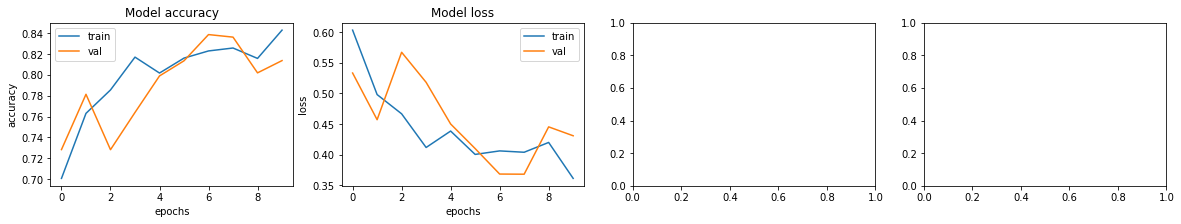

In [ ]:
#acc 및 loss plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate([ "accuracy", "loss"]):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history["val_" + met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)
    ax[i].legend(["train", "val"])

In [ ]:
model.save("VGG")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("VGG")

In [ ]:
#test 평가
model.evaluate(test_generator)

1250/1250 [==============================] - 57s 46ms/step - loss: 0.4385 - accuracy: 0.8106


[0.4385465681552887, 0.8106499910354614]